<a href="https://colab.research.google.com/github/salwang323/salwang323.github.io/blob/master/copy_of_predict_tomorrow_last.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
import pandas_datareader.data as pdr
import datetime as dt

start_date = dt.datetime(1999, 1, 1)
end_date = dt.datetime.now()

symbol = 'spy'  # Replace with the ticker symbol of the stock you want to fetch data for
df = yf.download(symbol, start=start_date, end=end_date)

print(df.head())

df = df[['Open', 'Close']]
close_prices = df['Close'].values
open_prices = df['Open'].values

# 归一化处理
scaler = MinMaxScaler()
df = scaler.fit_transform(df)

# 划分训练集和测试集
train_size = int(len(df) * 1)
train_data = df[:train_size]
#test_data = df[train_size:]

# 定义时间窗口大小
window_size = 20

# 创建训练集和测试集数据
def create_dataset(data, window_size):
    X, Y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i+window_size])
        Y.append(data[i+window_size])
    return np.array(X), np.array(Y)

X_train, Y_train = create_dataset(train_data, window_size)
#X_test, Y_test = create_dataset(test_data, window_size)

# 创建 LSTM 模型
model = Sequential()
model.add(LSTM(units=32, activation='relu', input_shape=(window_size, 2)))
model.add(Dense(units=2))
model.compile(optimizer='adam', loss='mse')

# 训练模型
model.fit(X_train, Y_train, epochs=50, batch_size=32, verbose=1)

# 预测tomorrow open, close
last_open = df[-1][0].reshape(1,1,1)
last_close = df[-1][1].reshape(1,1,1)
predicted_close = model.predict(last_close) * close_prices.max()
print(predicted_close)



# 将预测结果反归一化

# 可视化预测结果
#plt.plot(Y_test[:, 0], color='red', label='True Open Price')
#plt.plot(predicted[:, 0], color='blue', label='Predicted Open Price')
#plt.title('Stock Price Prediction (Open Price)')
#plt.xlabel('Time')
#plt.ylabel('Price')
#plt.legend()
#plt.show()


[*********************100%***********************]  1 of 1 completed
                Open       High        Low      Close  Adj Close   Volume
Date                                                                     
1999-01-04  123.3750  125.21875  121.71875  123.03125  79.463966  9450400
1999-01-05  122.9375  124.87500  122.93750  124.43750  80.372269  8031000
1999-01-06  125.8125  127.75000  125.75000  127.43750  82.309937  7737700
1999-01-07  126.3750  127.21875  125.78125  126.81250  81.906250  5504900
1999-01-08  128.1875  128.50000  125.96875  127.75000  82.511765  6224400
Epoch 1/50
192/192 [==============================] - 3s 5ms/step - loss: 0.0123
Epoch 2/50
192/192 [==============================] - 1s 5ms/step - loss: 1.2326e-04
Epoch 3/50
192/192 [==============================] - 1s 5ms/step - loss: 9.3358e-05
Epoch 4/50
192/192 [==============================] - 1s 5ms/step - loss: 8.3010e-05
Epoch 5/50
192/192 [==============================] - 1s 5ms/step - loss: 7.9

ValueError: ignored

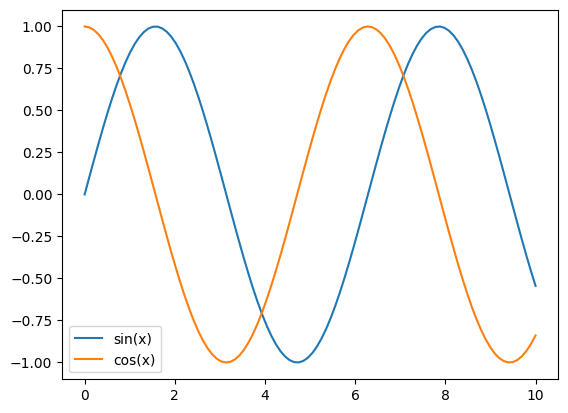

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 10, 100)
y1 = np.sin(x)
y2 = np.cos(x)

plt.plot(x, y1, label='sin(x)')
plt.plot(x, y2, label='cos(x)')
plt.legend()

plt.show()

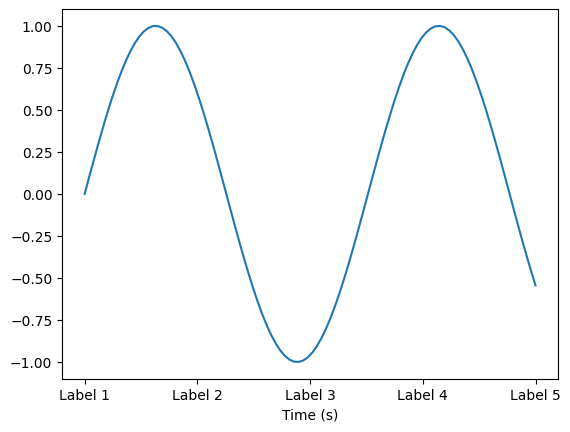

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Generate some sample data
x = np.linspace(0, 10, 100)
y = np.sin(x)

# Define the x-axis labels
labels = ['Label 1', 'Label 2', 'Label 3', 'Label 4', 'Label 5']

# Plot the data and set the x-axis labels
plt.plot(x, y)
plt.xticks(np.linspace(0, 10, 5), labels)
plt.xlabel('Time (s)')

# Show the plot
plt.show()

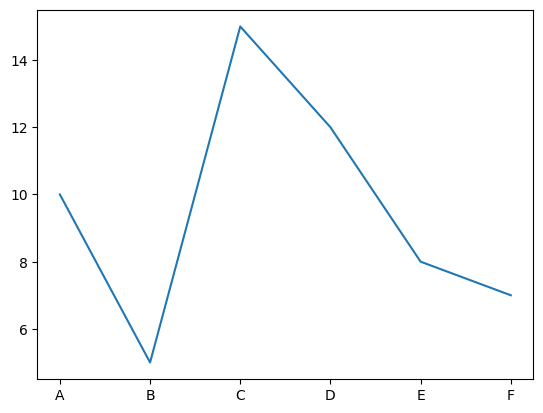

In [ ]:
import matplotlib.pyplot as plt

x = [0, 1, 2, 3, 4, 5]
y = [10, 5, 15, 12, 8, 7]

plt.plot(x, y)
plt.xticks(ticks=[0, 1, 2, 3, 4, 5], labels=['A', 'B', 'C', 'D', 'E', 'F'])
plt.show()